<a href="https://colab.research.google.com/github/sophialien/ReinforcementLearning/blob/master/Value_Iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Value Iteration


It starts with arbitrary policy values and the iteatively updates the values based on the Bellman optimality equation until they converge.

$ V^*(S) := \max_a [R(s,a) + \gamma \sum_{s'}T(s,a,s')V^*(s')]$

* $V^*(s)$ denotes the optimal 
value, which is the value of the optimal policy.

* $T(s, a, s')$ is the transition probability from state s to state s' by taking action a

* $R(s,a)$ is the reward received iin state s by taking action a.

Once the optimal values are computed, we can get the optimal policy:

$ \pi^*(s) := \text{argmax}_a \sum_{s'} T(s,a,s') [R(s,a,s'] + \gamma V^*(s')] $

# 1. Create an environment

In [0]:
import torch
import gym
import numpy as np
import matplotlib.pyplot as plt

env_name = 'Taxi-v3'
env = gym.make(env_name)

## 2. Set discount factor $\gamma $ and converge threshold

In [0]:
gamma = 0.9

max_iterations = 10**6
eps = 10**-3

# 3. Define the function for optimal policy based on the value iteration algorithm

In [0]:
def value_iteration(env, gamma=0.9, max_iterations=10**6, eps=10**-3):
    """        
    Run value iteration
    
    Input Arguments
    ----------
        env: 
            the target environment
        gamma: float
            the discount factor for rewards
        max_iterations: int
            maximum number of iterations for value iteration
        eps: float
            for the termination criterion of value iteration (converge threshod)
    ----------
    
    Output
    ----------
        policy: torch.tensor of size (500,)
    ----------
    """        
    
    num_spaces = env.observation_space.n
    num_actions = env.action_space.n
    k = 0

    #        1. Initialize the value function V(s), Policy(s)
    V = torch.zeros(num_spaces)
    policy = torch.zeros(num_spaces)

    #        2. Iterate and improve V(s) using the Bellman optimality operator
    #           Derive the optimal policy using V(s)
    
    while True:
        k += 1
        V_temp = torch.empty(num_spaces)
        for state in range(num_spaces):
            v_actions = torch.zeros(num_actions)
            for action in range(num_actions):
                for trans_prob, new_state, reward, _ in env.P[state][action]:
                    v_actions[action] += trans_prob * (reward + gamma * V[new_state])
            
            policy[state] = torch.argmax(v_actions)
            V_temp[state] = torch.max(v_actions)
        
        max_delta = torch.max(torch.abs(V - V_temp))
        V = V_temp.clone()
        
        if (max_delta <= eps) or (k >= max_iterations):
            break
    
    return policy

# 4. Print the optimal policy

In [8]:
print('== {} =='.format(env_name))
print('# of actions:', env.action_space.n)
print('# of states:', env.observation_space.n)
print(env.desc)

== Taxi-v3 ==
# of actions: 6
# of states: 500
[[b'+' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'+']
 [b'|' b'R' b':' b' ' b'|' b' ' b':' b' ' b':' b'G' b'|']
 [b'|' b' ' b':' b' ' b'|' b' ' b':' b' ' b':' b' ' b'|']
 [b'|' b' ' b':' b' ' b':' b' ' b':' b' ' b':' b' ' b'|']
 [b'|' b' ' b'|' b' ' b':' b' ' b'|' b' ' b':' b' ' b'|']
 [b'|' b'Y' b'|' b' ' b':' b' ' b'|' b'B' b':' b' ' b'|']
 [b'+' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'+']]


In [0]:
def print_policy(policy, mapping=None, shape=(0,)):
    print(np.array([mapping[action.item()] for action in policy]).reshape(shape))

In [14]:
vi_policy = value_iteration(env)
action_map = {0: "S", 1: "N", 2: "E", 3: "W", 4: "P", 5: "D"}

print_policy(vi_policy, action_map, shape=None)

['P' 'P' 'P' 'P' 'E' 'E' 'E' 'E' 'S' 'S' 'S' 'S' 'E' 'E' 'E' 'E' 'D' 'E'
 'S' 'E' 'W' 'W' 'W' 'W' 'S' 'S' 'S' 'S' 'W' 'W' 'W' 'W' 'S' 'S' 'S' 'S'
 'W' 'S' 'W' 'S' 'S' 'S' 'S' 'S' 'E' 'E' 'E' 'E' 'S' 'S' 'S' 'S' 'E' 'E'
 'E' 'E' 'S' 'E' 'S' 'E' 'W' 'W' 'W' 'W' 'E' 'E' 'E' 'E' 'W' 'W' 'W' 'W'
 'S' 'S' 'S' 'S' 'W' 'E' 'W' 'S' 'W' 'W' 'W' 'W' 'P' 'P' 'P' 'P' 'W' 'W'
 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'D' 'W' 'W' 'N' 'N' 'N' 'N' 'E' 'E' 'E' 'E'
 'S' 'S' 'S' 'S' 'E' 'E' 'E' 'E' 'N' 'E' 'S' 'E' 'W' 'W' 'W' 'W' 'S' 'S'
 'S' 'S' 'W' 'W' 'W' 'W' 'S' 'S' 'S' 'S' 'W' 'S' 'W' 'S' 'S' 'S' 'S' 'S'
 'E' 'E' 'E' 'E' 'S' 'S' 'S' 'S' 'E' 'E' 'E' 'E' 'S' 'E' 'S' 'E' 'W' 'W'
 'W' 'W' 'E' 'E' 'E' 'E' 'W' 'W' 'W' 'W' 'S' 'S' 'S' 'S' 'W' 'E' 'W' 'S'
 'W' 'W' 'W' 'W' 'N' 'N' 'N' 'N' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'N'
 'W' 'W' 'N' 'N' 'N' 'N' 'E' 'E' 'E' 'E' 'S' 'S' 'S' 'S' 'E' 'E' 'E' 'E'
 'N' 'E' 'S' 'E' 'W' 'W' 'W' 'W' 'E' 'E' 'E' 'E' 'W' 'W' 'W' 'W' 'E' 'E'
 'E' 'E' 'W' 'E' 'W' 'E' 'W' 'W' 'W' 'W' 'E' 'E' 'E

# 5. Run 1000 episodes and gauge the optimal policy 

In [0]:
def run_episode(env, policy):
  """
  Run episode under given policy

  Input Arguments
  ------
  env:
      the target environment
  policy: torch.tensor of size (500,)
      current policy
  ------

  Output
  ------
  total_reward : scaler
      total reward for one episode
  ------

  """
  state = env.reset()
  total_reward = 0
  is_done = False
  while not is_done:
    action = policy[state].item()
    state, reward, is_done, info = env.step(action)
    total_reward += reward
    if is_done:
      break
  return total_reward

In [0]:
n_episode = 1000
total_rewards = []
for episode in range(n_episode):
  total_reward = run_episode(env, vi_policy)
  total_rewards.append(total_reward)

Average toatl reward: 7.985


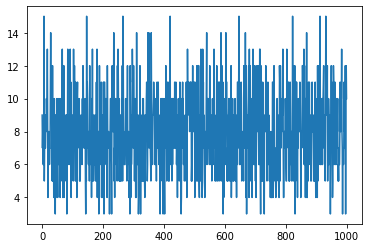

In [16]:
print('Average toatl reward:', sum(total_rewards)/n_episode)
plt.plot(total_rewards)